# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2022.01.24.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- Write your Python code that can answer the following questions, 
- and explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [1]:
import pandas as pd
import numpy as np

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [61]:
# 1. Load the data
invoices = pd.read_json("https://github.com/umsi-data-science/data/raw/main/invoices.json")
items = pd.read_json("https://github.com/umsi-data-science/data/raw/main/items.json")
purchases = pd.read_json("https://github.com/umsi-data-science/data/raw/main/purchases.json")

display(invoices.head(), items.head(), purchases.head())

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


In [3]:
# 2. Total invoices
# First drop the cancellation where InvoiceNo starts with the letter 'C'
invoices_shipped = invoices[~invoices['InvoiceNo'].astype(str).str.startswith('C')]
print("Total invoices: " + str(invoices_shipped.InvoiceNo.nunique()))

# 3. Unique customers
print("Unique customers: " + str(invoices_shipped.CustomerID.nunique()))

# 4. Total number of unique items
print("Total number of unique items: " + str(items.StockCode.nunique()))

# 5. Columns with null values
# First drop the cancellation where InvoiceNo starts with the letter 'C'
purchases_shipped = purchases[~purchases['InvoiceNo'].astype(str).str.startswith('C')]
print("In invoices_shipped: " + str(invoices_shipped.columns[invoices_shipped.isna().any()]))
print("In items: " + str(items.columns[items.isna().any()]))
print("In purchases_shipped " + str(purchases_shipped.columns[purchases_shipped.isna().any()]))

Total invoices: 22064
Unique customers: 4339
Total number of unique items: 4070
In invoices_shipped: Index(['CustomerID'], dtype='object')
In items: Index(['Description'], dtype='object')
In purchases_shipped Index([], dtype='object')


In [60]:
# 6. Join different tables
invoices_shipped.merge(purchases_shipped,on='InvoiceNo').head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6


**Answer.** 
1. There are 22064 invoices in total.
1. There are 4339 unique customers.
1. The total number of unique items is 4070.
1. The "CustomerID" column in invoices and the "Description" column in items have null values.
1. To join the different tables, the first step is to join the invoices and purchases table based on the "InvoiceNo" column. The company finds it hard to join the items and purchases table because the columns to join have different indices. The items table has the column "StockCode" while the purchases table has the column "StockCodeSC". Therefore, the two columns cannot match. To solve this problem, the two columns should have the same form of recording, either pure numbers or with "SC" in the head.

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [5]:
# 1. Calculate customer counts based on invoices
print("The top 10 customers who have placed an invoice: \n")
print(invoices_shipped.CustomerID.value_counts().head(10))

# 2. Calculate total quantity of items ordered for each customer
print("The top 10 customers who have the most total quantity of items: \n")
newip = invoices_shipped.merge(purchases_shipped,on='InvoiceNo')
print(newip.groupby('CustomerID').sum().Quantity.sort_values(ascending=False).head(10))

The top 10 customers who have placed an invoice: 

12748.0    211
14911.0    202
17841.0    124
13089.0     97
14606.0     95
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: CustomerID, dtype: int64
The top 10 customers who have the most total quantity of items: 

CustomerID
14646.0    197491
14911.0     81009
16446.0     80997
12415.0     77670
12346.0     74215
17450.0     69993
17511.0     67423
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64


**Answer.**
1. The top 10 customers who have placed an invoice are listed above. Use `head(11)` for a tie check and there is no tie.
1. The top 10 customers who have the most total quantity of items are listed above. Use `head(11)` for a tie check and there is no tie.
1. By comparing the customer IDs in the two situations, it can be observed that the relationship is not accurate as only two customer IDs are the same (14646, 14911). The reason may be that the customer may order a large quantity of items once, therefore only have one invoice number.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

The average item-unit price:
Sterling: 6.905277886977952
USD: 9.253072368550338
The percentage of items under 25$:
98.15724815724816


<AxesSubplot:ylabel='Frequency'>

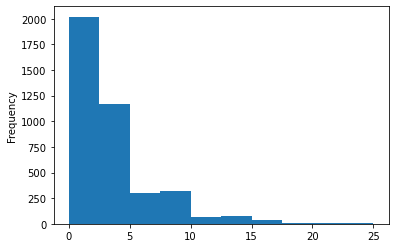

In [80]:
items['USD'] = items['UnitPrice'] * 1.34 # Convert sterling to USD

# 1. Average item-unit price
print("The average item-unit price:")
print("Sterling: " + str(items['UnitPrice'].mean()))
print("USD: " + str(items['USD'].mean()))

# 2. Item percentage under 25$
print("The percentage of items under 25$:")
print(len(items[items['USD'] < 25]) / len(items) * 100)

# 3. 
items['UnitPrice'].plot.hist(range=[0, 25])

**Answer.**
1. The average item-unit price is about \\$9.25.
1. About 98.16\% of items are under \\$25.
1. I selected the min value for x-axis to be 0 and the max value for x-axis to be 25. 0 is the min unit price among all items. According to the last question, around 98.16\% of items are under \\$25, therefore it is reasonable to generate the histogram which focuses on the main part. From the histogram, it can be observed that, most of the items' unit prices are less than \\$5 and there are only few items having prices larger than 17.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [88]:
# 1. Top 10 most ordered items
purchases_new = purchases_shipped.rename(columns={'StockCodeSC': 'StockCode'})
purchases_new.StockCode = purchases_new.StockCode.str.lstrip('SC')
most_items = purchases_new.groupby('StockCode').Quantity.sum().sort_values(ascending=False).head(10).index.tolist()
items[items['StockCode'].isin(most_items)]

,StockCode,Description,UnitPrice,USD
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,3.4170
9,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69,2.2646
44,22492,MINI PAINT SET VINTAGE,0.65,0.8710
69,21212,PACK OF 72 RETROSPOT CAKE CASES,0.42,0.5628
140,85099B,JUMBO BAG RED RETROSPOT,1.65,2.2110
170,22197,SMALL POPCORN HOLDER,0.72,0.9648
1367,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29,0.3886
2952,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,1.3936
3452,23084,RABBIT NIGHT LIGHT,2.08,2.7872
4069,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,2.7872


In [86]:
# 2. Top 5 invoices generated the most revenue
# revenue = unit price * 1.25
# merge the three tables together
invoice_purchases = invoices_shipped.merge(purchases_new, on='InvoiceNo')
invoice_purchases_items = invoice_purchases.merge(items, on='StockCode')

invoice_purchases_items['Revenue_USD'] = invoice_purchases_items.USD * 1.25 * invoice_purchases_items.Quantity
most_revenue = invoice_purchases_items.groupby('InvoiceNo').Revenue_USD.sum().sort_values(ascending=False).head(5)
display(most_revenue)

InvoiceNo
547966    954364.75000
581483    282186.58000
541431    129282.53000
556255     49988.70000
556917     46291.52275
Name: Revenue_USD, dtype: float64

In [87]:
# 3. Do the top 5 invoices contain any of the top 10 most ordered items?
top10_items = invoice_purchases_items.groupby('StockCode').Quantity.sum().sort_values(ascending=False).head(10).index.tolist()
top5_invoices = invoice_purchases_items.groupby('InvoiceNo').Revenue_USD.sum().sort_values(ascending=False).head(5).index.tolist()
top5_invoices_items = invoice_purchases_items[invoice_purchases_items['InvoiceNo'].isin(top5_invoices)].StockCode.unique()
set(top5_invoices_items) & set(top10_items)

{'21212', '22492', '23084', '23166', '23843', '85099B'}

**Answer.**
1. The 10 most ordered items are shown in the table above. Most of them are some small daily gadgets with low price.
1. The top 5 invoices that generated the most revenue are: 547966, 581483, 541431, 556255 and 556917.
1. The top 5 invoices contain 6 of the top 10 most ordered items.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1500  
 * medium value: between 1500 and 8000 dollars
 * high value: greater than \$8000
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [58]:
# 1. Classify customers based on total revenue
customer = pd.DataFrame(invoice_purchases_items.groupby('CustomerID').Revenue_USD.sum().reset_index())
customer['Segment'] = pd.cut(customer.Revenue_USD, bins = [0, 1500, 8000, np.inf], labels = ['Low', 'Medium', 'High'])
display(customer.head())

# 2. Number of customers in each segment
print(customer.groupby('Segment').size())

,CustomerID,Revenue_USD,Segment
0,12346.0,129282.530,High
1,12347.0,9109.387,High
2,12348.0,2998.518,Medium
3,12349.0,3227.658,Medium
4,12350.0,683.467,Low


Segment
Low       2301
Medium    1662
High       376
dtype: int64


In [57]:
# 3. Average order quantity of each stock code for a given segment
# Merge the customer and invoice_purchases_items tabels for both information
# Create a pivot table with according index, columns and values
# values: average order quantity; index: stockcode; columns: segment
full = customer.merge(invoice_purchases_items, on='CustomerID', how='inner')
table = full.pivot_table(index='StockCode', columns='Segment', values='Quantity', aggfunc=np.mean)
table.head()

Segment,Low,Medium,High
StockCode,,,
10002,6.0,9.640000,26.714286
10080,24.0,12.071429,16.333333
10120,5.5,6.833333,7.000000
10123C,2.0,1.000000,NaN
10124A,3.5,3.000000,NaN


In [67]:
# 4. Are the items with the highest average order quantity generally the same across segments?
highest_LMH = [table['Low'].idxmax(), table['Medium'].idxmax(), table['High'].idxmax()]
table[table.index.isin(highest_LMH)]

Segment,Low,Medium,High
StockCode,,,
17096,516.75,32.200000,72.0
18007,13.75,520.818182,24.0
23843,NaN,NaN,80995.0


In [71]:
# 5. Choose three items and discuss trends
items[items['StockCode'].isin(highest_LMH)]

,StockCode,Description,UnitPrice
2122,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,0.18
2381,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43
4069,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08


**Answer.**
1. The customers have been classified into segments based on the total revenue in the "customer" table.
1. There are 2301 customers in the "Low" segment, 1662 customers in the "Medium" segment and 376 customers in the "High" segment.
1. The pivot table has been created and shown above.
1. Across all three segments, the items with the highest average order quantity are different, with three stock codes: 17096, 18007, 23843. This is reasonable because people in different segments tend to have different consumption levels and different preferable items.
1. Take the three items chosen in question 4 as an example. For the "Low" segment, the item with the highest average quantity is the assorted laquered incense holder while in the "Medium" segment, most customers tend to order envelopes which are cheaper. Most customers in the "High" segment tend to order more expensive items, where the item of the highest average order quantity is the little birdie paper craft.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas